In [1]:
## the same libraries that we had in "Visualizing_Audio"

import numpy as np
import importlib
import phonlab as phon
from IPython.display import Audio
import matplotlib.pyplot as plt

## New libraries used here for the first time
import parselmouth
import seaborn as sns
import pandas as pd

print(phon.__name__,phon.__version__)

phonlab 0.0.26


# a. Compute and plot f0 traces

* look at the [phonlab documentation](https://phonlab.readthedocs.io/en/latest/acoustphon.html#pitch-tracking) to see the different pitch tracking functions available.
* note how we can add a trace to the spectrogram by getting the matplotlib axes object from sgram.

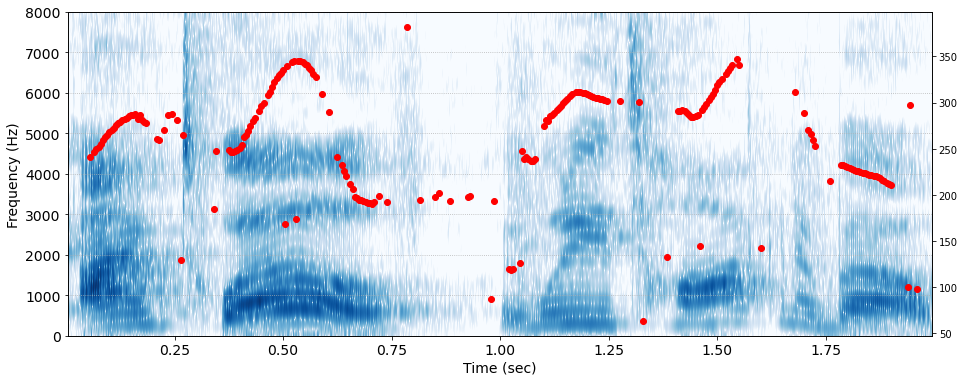

In [2]:
example_file = importlib.resources.files('phonlab') / 'data' / 'example_audio' / 'stereo.wav'
local_file = 'dimex/s09003.wav'

x,fs = phon.loadsig(example_file,chansel=[0])
f0df = phon.get_f0_acd(x,fs,prom=20)

# make a plot
ret = phon.sgram(x,fs,cmap='Blues') # draw a spectrogram of the sound
ax1 = ret[0]  # get the plot axis
ax2 = ax1.twinx()  # and twin it for plotting f0
ax2.plot(f0df.sec, f0df.f0, 'ro')  
#ax2.set_ylim(120,360)
Audio(x,rate=fs)

## b. Here's what a pandas dataframe looks like

This is the result of running "get_f0_acd" over the audio samples.

In [3]:
print(f0df)

       sec    f0        rms       h1h2    c     probv  voiced
0    0.020   NaN -46.706184        NaN  5.0  0.048661   False
1    0.025   NaN -41.521969        NaN  5.0  0.104939   False
2    0.030   NaN -36.874432        NaN  5.0  0.197830   False
3    0.035   NaN -33.954758        NaN  5.0  0.282365   False
4    0.040   NaN -32.423321        NaN  5.0  0.334538   False
..     ...   ...        ...        ...  ...       ...     ...
387  1.955   NaN -33.836369        NaN  5.0  0.286219   False
388  1.960  97.5 -34.176224 -10.992931  2.0  0.820804    True
389  1.965   NaN -34.496334        NaN  5.0  0.265142   False
390  1.970   NaN -34.876160        NaN  5.0  0.253471   False
391  1.975   NaN -35.633690        NaN  5.0  0.231228   False

[392 rows x 7 columns]


## Try these exersizes  (refer to the documentation for the various functions)

* Plot the F0 trace with red plus signs
* Plot the RMS amplitude trace instead of the F0 trace
* Plot the F0 trace on it's own, without a spectrogram

# c. Use parselmouth to run Praat pitch tracing.

In [4]:
example_file = importlib.resources.files('phonlab') / 'data/example_audio/stereo.wav'

snd = parselmouth.Sound(str(example_file)).extract_left_channel()  # create a Praat Sound object
pitch = snd.to_pitch()  # create a Praat pitch object
f0df_praat = phon.pitch_to_df(pitch)  # convert it into a Pandas dataframe

f0df_praat

,sec,f0
0,0.024062,NaN
1,0.034062,NaN
2,0.044062,NaN
3,0.054062,239.147403
4,0.064062,245.237052
...,...,...
191,1.934063,100.195697
192,1.944062,98.644271
193,1.954062,98.383765
194,1.964062,97.349536


## d. Compare pitch traces 

* this block of code plots F0 that was calculated above in a. (saved in dataframe 'f0df')
* together with the parselmouth F0 trace (saved in dataframe 'f0df_praat')

(120.0, 360.0)

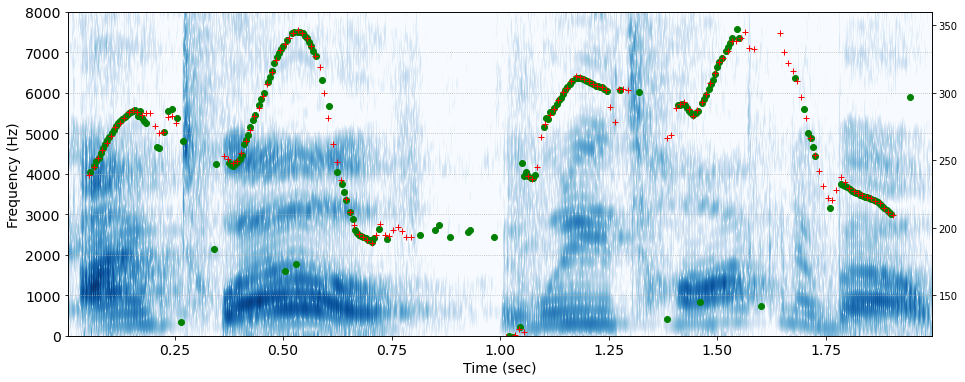

In [5]:
ret = phon.sgram(x,fs,cmap='Blues') # draw a spectrogram of the sound

ax1 = ret[0]  # get the plot axis
ax2 = ax1.twinx()  # and twin it for plotting f0
ax2.plot(f0df.sec, f0df.f0, 'go')  
ax2.plot(f0df_praat.sec, f0df_praat.f0, 'r+')  

ax2.set_ylim(120,360)

# e. Compute and plot formant values

LPC_tracking(), with order set to -1, and pitch range [63, 400]
Resampling from 48000 to 12000
Selected LPC order is: 10


<Axes: xlabel='Time (sec)', ylabel='Frequency (Hz)'>

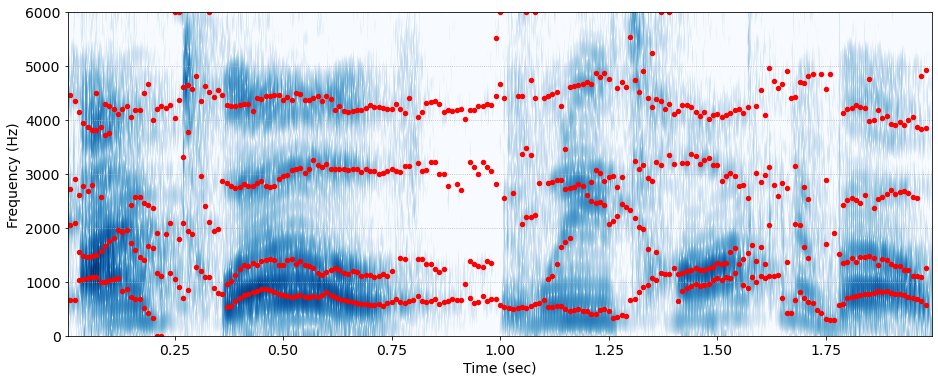

In [23]:
example_file = importlib.resources.files('phonlab') / 'data' / 'example_audio' / 'stereo.wav'

x,fs = phon.loadsig(example_file,chansel=[0])  # read in the audio

fmtdf = phon.track_formants(x,fs)  # compute formant frequencies

# make a plot
phon.sgram(x,fs, cmap="Blues",tf = 6000)  # plot the spectrogram

# add formant dots to the spectrogram
dot_color = "red"
sns.pointplot(fmtdf,x='sec',y='F1',linestyle='none',native_scale=True,marker=".",color=dot_color)
sns.pointplot(fmtdf,x='sec',y='F2',linestyle='none',native_scale=True,marker=".",color=dot_color)
sns.pointplot(fmtdf,x='sec',y='F3',linestyle='none',native_scale=True,marker=".",color=dot_color)
sns.pointplot(fmtdf,x='sec',y='F4',linestyle='none',native_scale=True,marker=".",color=dot_color)

## f. Use Praat parselmouth to compute formants

* the figure here compares the formants calculated by track_formants() with those calculated in parselmouth.

<Axes: xlabel='Time (sec)', ylabel='Frequency (Hz)'>

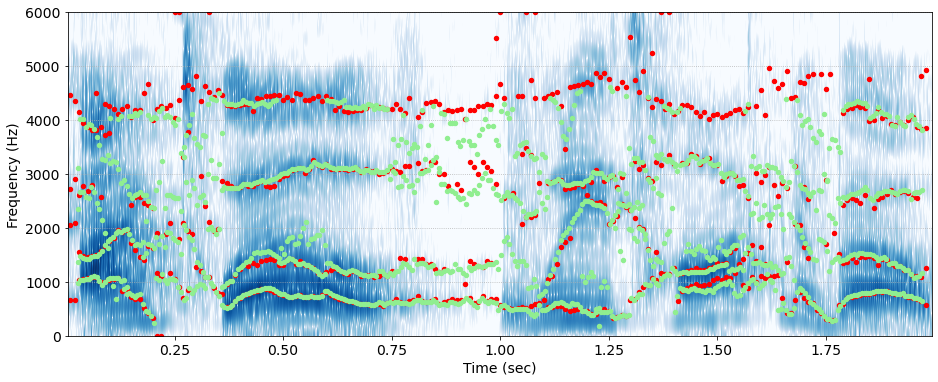

In [24]:
example_file = importlib.resources.files('phonlab') / 'data' / 'example_audio' / 'stereo.wav'

snd = parselmouth.Sound(str(example_file)).extract_left_channel()  # create a Praat Sound object
maxf = 5000       # use 5000 for men, 6000 for women, 8000 for children
fmnt = snd.to_formant_burg(maximum_formant=maxf)  # create a Praat Formant object
fmtdf_praat = phon.formant_to_df(fmnt, 4, include_bw=False)  # convert it into a Pandas dataframe

phon.sgram(x,fs, cmap="Blues",tf=6000)  # plot the spectrogram

# add formant dots to the spectrogram, first for phon.track_formants()
dot_color = "red"
sns.pointplot(fmtdf,x='sec',y='F1',linestyle='none',native_scale=True,marker=".",color=dot_color)
sns.pointplot(fmtdf,x='sec',y='F2',linestyle='none',native_scale=True,marker=".",color=dot_color)
sns.pointplot(fmtdf,x='sec',y='F3',linestyle='none',native_scale=True,marker=".",color=dot_color)
sns.pointplot(fmtdf,x='sec',y='F4',linestyle='none',native_scale=True,marker=".",color=dot_color)

# then for snd.to_formant_burg()
dot_color = "lightgreen"
sns.pointplot(fmtdf_praat,x='sec',y='F1',linestyle='none',native_scale=True,marker=".",color=dot_color)
sns.pointplot(fmtdf_praat,x='sec',y='F2',linestyle='none',native_scale=True,marker=".",color=dot_color)
sns.pointplot(fmtdf_praat,x='sec',y='F3',linestyle='none',native_scale=True,marker=".",color=dot_color)
sns.pointplot(fmtdf_praat,x='sec',y='F4',linestyle='none',native_scale=True,marker=".",color=dot_color)

## Try these exersizes  (refer to the documentation for the various functions)

* Try calculating formants with the IFC option in phon.track_formants - how do these compare with parselmouth?
* What is different when you specify 'quiet=True' in track_formants?
* What columns are present in the fmtdf and fmtdf_praat dataframes?
* Try reproducing the figure above under 'compare pitch traces' but here comparing the pitch trace calculated in the track_formants() function with one of the others.

# g. Measuring fricative spectral properties

The function [phon.fricative()](https://phonlab.readthedocs.io/en/latest/acoustphon.html#consonant-features) implements the widely used 'spectral moments' analysis that was introduced in phonetic studies by Forrest et al. (xxxx), as well as a major peaks analysis inspired by the work of Christine Shadle.

This block also shows off the spectral slice option in phon.sgram(), a throwback to the original Kay Spectrograph, circa 1955.



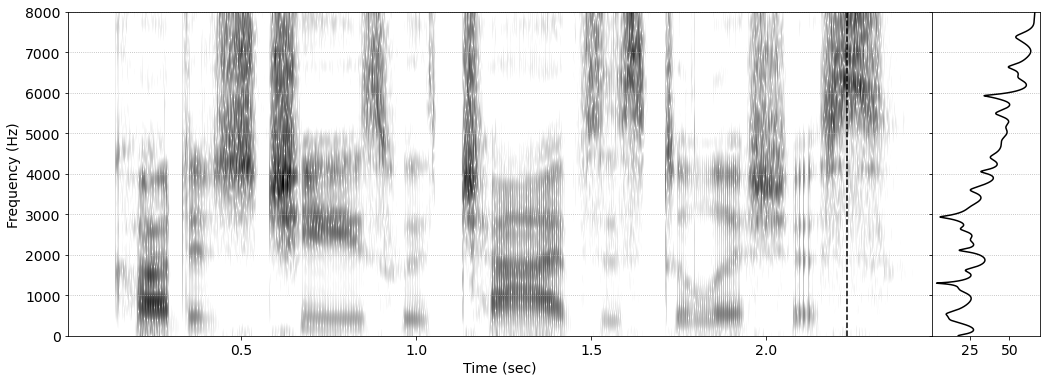

In [7]:
example_file = importlib.resources.files('phonlab') / 'data' / 'example_audio' / 'sf3_cln.wav'

x,fs = phon.loadsig(example_file, chansel=[0])
ret= phon.sgram(x,fs,slice_time=2.23) # note the use of the "slice_time" option
Audio(example_file)

Resampling from 16000 to 16000
first major peak at 6200.0, Center of Gravity is 5809.8


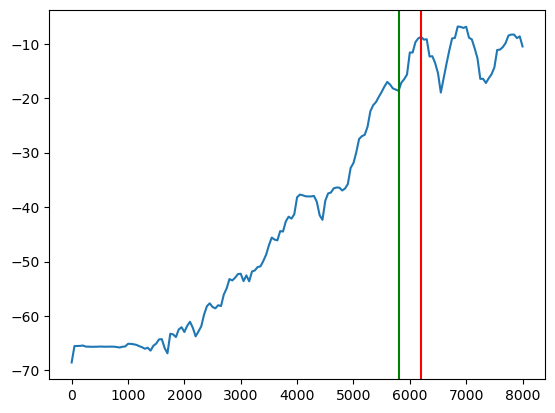

In [11]:
x,fs = phon.prep_audio(x,fs, target_fs=16000, pre=0.94)

Fm,Am,AmpD,Fsec,Asec,mode,COG,SD,Skew,Kurtosis,spec,freq = phon.fricative(x,fs,2.235)

print(f"first major peak at {Fm:.1f}, Center of Gravity is {COG:.1f}")
plt.plot(freq,spec)
plt.axvline(Fm,color="red")
plt.axvline(COG,color="green")

## Exercises

* pick another fricative in the audio file and compare Fm and COG for that one.
* Look at effect of parameters in the input to the process (sampling frequency and preemphasis)
* what changes with prep_audio(.... , out_type="int")
* compare the Fm and COG values for fricatives at times 0.49, 0.61, 0.88 and 2.23
* inspect the various analysis results (FmB, Am, etc.) for various fricatives.
    * can you format this as a dataframe or spreadsheet

In [27]:
times = [0.49, 0.61]

for t in times:
    Fm,FmB,Am,mode,COG,SD,Skew,Kurtosis,spec,freq = phon.fricative(x,fs,t)
    print(f"time: {t} -- first major peak at {Fm:.1f}, Center of Gravity is {COG:.1f}")



time: 0.49 -- first major peak at 4200.0, Center of Gravity is 5173.8
time: 0.61 -- first major peak at 3700.0, Center of Gravity is 4958.8


# h. Finding a stop release burst

* prep_audio() does several thihngs: 
    * add preemphasis,
    * resample to 22050,
    * ensure correct polarity, and s
    * cale to use maximum range

* burst() is trained on the Timit corpus and is a simple linear regression model
    * evidence that the burst is at a location is:
    * b = -1.814 + 0.618*w + 0.045*s
    * where w is size of a waveform peak, and s is magnitude of spectral change

Resampling from 48000 to 22050
the stop release burst is at time: 0.269 seconds


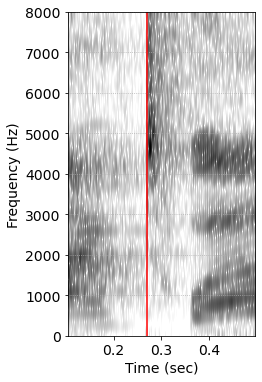

In [28]:
example_file = importlib.resources.files('phonlab') / 'data' / 'example_audio' / 'im_twelve.wav'

x,fs = phon.loadsig(example_file, chansel=[0])  
x,fs = phon.prep_audio(x,fs, pre=0.94) 

# look for a stop release burst in this portion of the audio: time 1 (t1) to time 2 (t2)
t1 = 0.1  # seconds
t2 = 0.5

b_time, b_score = phon.burst(x,fs, t1,t2)  # find a stop burst in the span from t1 to t2
print(f"the stop release burst is at time: {b_time:.3f} seconds")
 
ax1,f,t,Sxx = phon.sgram(x,fs,start=t1, end=t2)
if b_time > 0:  # will be -1 if no burst was found
    ax1.axvline(b_time,color="red")


## Exercise

* try finding bursts in other time chunks, or in other sound files.